# Problem Euler 19

1 Jan 1900 was a Monday.
Thirty days has September,
April, June and November.
All the rest have thirty-one,
Saving February alone,
Which has twenty-eight, rain or shine.
And on leap years, twenty-nine.
A leap year occurs on any year evenly divisible by 4, but not on a century unless it is divisible by 400.
How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?]

In [2]:
from datetime import date

sundays=0
for year in range(1901,2001):
    for month in range(1,13):
        if date(year,month,1).weekday()==6:
            sundays+=1
print(sundays)

171


# Problem Euler 166

A 4x4 grid is filled with digits d, 0 ≤ d ≤ 9.

It can be seen that in the grid
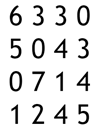

the sum of each row and each column has the value 12. Moreover the sum of each diagonal is also 12.

In how many ways can you fill a 4x4 grid with the digits d, 0 ≤ d ≤ 9 so that each row, each column, and both diagonals have the same sum?

In [7]:
def crisscross():
    ans = 0
    digitos = tuple(range(10))
    for b in digitos:
        for c in digitos:
            for d in digitos:
                for e in digitos:
                    for i in digitos:
                        m = b + c + d - e - i
                        if m < 0 or m > 9: continue
                        for k in digitos:
                            f = b + c + d*2 - e - i - k
                            if f < 0 or f > 9: continue
                            for a in digitos:
                                for g in digitos:
                                    o = a + b + d - g - k
                                    if o < 0 or o > 9: continue
                                    j = a + b + c - g - m
                                    if j < 0 or j > 9: continue
                                    l = a + b + c + d - i - j - k
                                    if l < 0 or l > 9: continue
                                    h = a + b + c + d - e - f - g
                                    if h < 0 or h > 9: continue
                                    n = a + c + d - f - j
                                    if n < 0 or n > 9: continue
                                    p = a + b + c - h - l
                                    if p < 0 or p > 9: continue
                                    ans += 1
    return str(ans)


if __name__ == "__main__":
    print(crisscross())


7130034


# Project Euler 171

For a positive integer n, let f(n) be the sum of the squares of the digits (in base 10) of n, e.g.

f(3) = 32 = 9,
f(25) = 22 + 52 = 4 + 25 = 29,
f(442) = 42 + 42 + 22 = 16 + 16 + 4 = 36

Find the last nine digits of the sum of all n, 0 < n < 1020, such that f(n) is a perfect square.

In [4]:
import math

DP = [None, {}]

base = 10 
num = 20 
mod = 10**9

s = 0
for d in range(1, base):
    DP[1][d * d] = {'sum': d, 'count': 1}
    s += d

for i in range(2, num + 1):
    DP.append({})
    for f, v in DP[i - 1].items():
        for d in range(0, base):
            f_p = f + d * d
            if f_p not in DP[i]:
                DP[i][f_p] = {'sum': 0, 'count': 0}
            DP[i][f_p]['count'] += DP[i - 1][f]['count']
            DP[i][f_p]['sum'] += 10 * DP[i - 1][f]['sum'] + d * DP[i - 1][f]['count']
    for f, v in DP[i].items():
        if math.floor(math.sqrt(f)) ** 2 == f:
            s += v['sum']
            s %= mod

print(s)


142989277


# Project Euler 250

Find the number of non-empty subsets of {11, 22, 33,..., 250250250250}, the sum of whose elements is divisible by 250. Enter the rightmost 16 digits as your answer.

In [3]:
W = [ [ 1 ] + [ 0 ] * 249, [ 0 ] * 250 ]
for i in range( 1, 250250 + 1 ):
    for q in range( 0, 250 ):
        W[ i % 2 ][ q ] = ( W[ ( i + 1 ) % 2 ][ q ] + W[ ( i + 1 ) % 2 ][ ( q - pow( i, i, 250 ) ) % 250 ] ) % 10000000000000000
print (W[ 0 ][ 0 ])

1425480602091520
